## **Proyecto DSRP - Grupo 1**

In [ ]:
'''
  :dataset: adult income data
  :plataforma: Windows
  :sinopsis: Exploración a partir de datos relacionados a los factores que influyen en los ingresos anuales de individuos en diversos paises.
  (Entre estos factores se encuentran el nivel educativo, la edad, el género, la ocupación, etc.)
  :autores:  
  Bryan Buiza, bryan.buiza.6@gmail.com
  Luis Guanilo, luigqfer@gmail.com
  Roberto Mendez, robertomendez.vilca@gmail.com
  José Tuyo, jose.tuyo90@gmail.com
	Elias Apaza, apazaramose@gmail.com
'''

'\n  :dataset: adult income data\n  :plataforma: Windows\n  :sinopsis: Exploración a partir de datos relacionados a los factores que influyen en los ingresos anuales de individuos en diversos paises.\n  (Entre estos factores se encuentran el nivel educativo, la edad, el género, la ocupación, etc.)\n  :autores:  \n  Bryan Buiza, bryan.buiza.6@gmail.com\n  Luis Guanilo, luigqfer@gmail.com\n  Roberto Mendez, robertomendez.vilca@gmail.com\n  José Tuyo, jose.tuyo90@gmail.com\n\tElias Apaza, apazaramose@gmail.com\n'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier #Random_forest
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.naive_bayes import GaussianNB #Naive_bayes
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.options.display.float_format = '{:,.2f}'.format

### **Dataset: Ingresos de adultos**

#### Importar Dataset

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PEAA/Metodología de Investigación/adult.csv')
df = pd.read_csv('https://github.com/bryanbuiza/jobs_scraper/raw/master/adult.csv')

#### Descripción de las Variables

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Descripción de las variables numéricas
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,"48,842.00","48,842.00","48,842.00","48,842.00","48,842.00","48,842.00"
mean,38.64,"189,664.13",10.08,"1,079.07",87.50,40.42
std,13.71,"105,604.03",2.57,"7,452.02",403.00,12.39
min,17.00,"12,285.00",1.00,0.00,0.00,1.00
25%,28.00,"117,550.50",9.00,0.00,0.00,40.00
50%,37.00,"178,144.50",10.00,0.00,0.00,40.00
75%,48.00,"237,642.00",12.00,0.00,0.00,45.00
max,90.00,"1,490,400.00",16.00,"99,999.00","4,356.00",99.00


In [ ]:
# df = df.rename(columns={'sex': 'gender', 'class': 'income', 'hoursperweek':'hours-per-week'})

In [ ]:
# Valores de las variables categóricas


for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
  separador = '--------------------------------------------'
  print(i + ' ' + str(df[i].nunique()) +'\n' + separador)
  print(df[i].unique())
  print('\n')

workclass 9
--------------------------------------------
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education 16
--------------------------------------------
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


marital-status 7
--------------------------------------------
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation 15
--------------------------------------------
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


relationship 6
--------------------------------------------
['Own-child' 'Husband' 'Not-in-family' 'Unmarried

*Descripción de las Variables*
<li>age (edad)
<li>workclass (tipo de empleador)
<li>fnlwgt
<li>education (ultimo grado de educacion)
<li>educational-num (education expresado en numeros enteros)
<li>marital-status (estado civil)
<li>occupation (profesion)
<li>relationship (similar al estado civil)
<li>race (grupo étnico)
<li>gender (género)
<li>capital-gain (ahorro)
<li>capital-loss (pérdida)
<li>hours-per-week (horas trabajadas por semana)
<li>native-country (país de origen)
<li>income (ingreso mayor o menor igual a 50K)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61613ac080>,
      dtype=object)

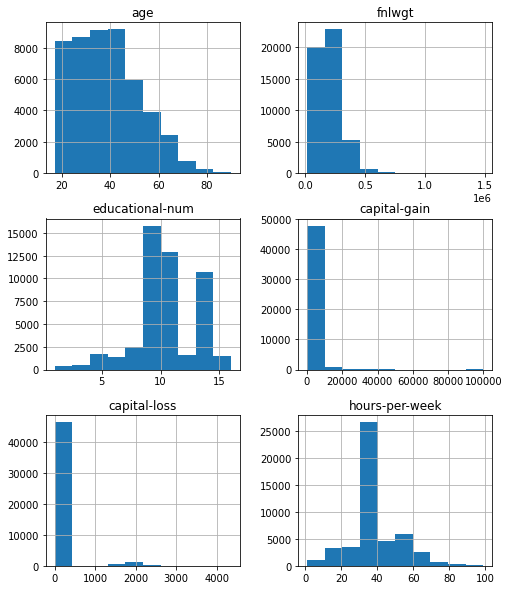

In [ ]:
df.hist(figsize=(8,10))

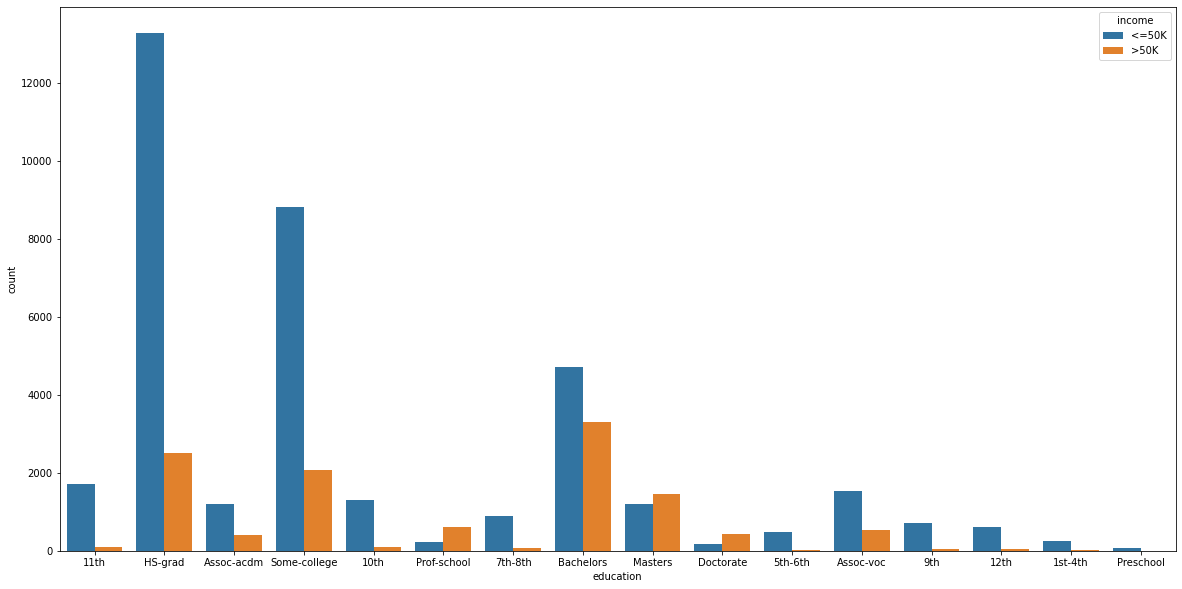

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(data=df, x='education', hue='income')

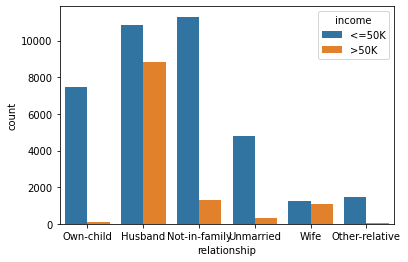

In [ ]:
ax = sns.countplot(x="relationship", hue="income", data=df)

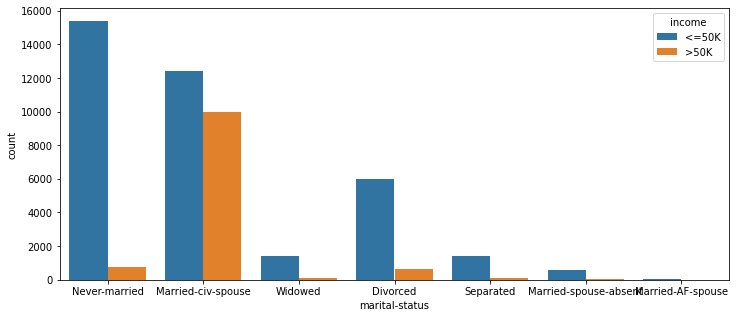

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x="marital-status", hue="income", data=df, ax=ax)

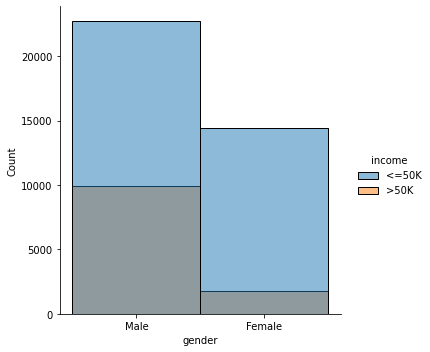

In [ ]:
sns.displot(df, x='gender', hue='income')

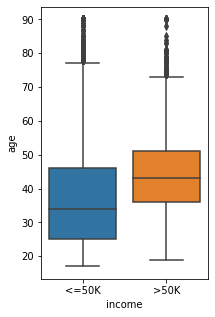

In [ ]:
fig = plt.figure(figsize=(3,5))
sns.boxplot(data=df,x='income',y='age')

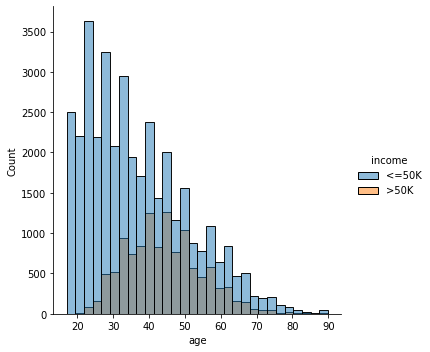

In [ ]:
sns.displot(df,x='age', hue='income',kind='hist',bins=30)

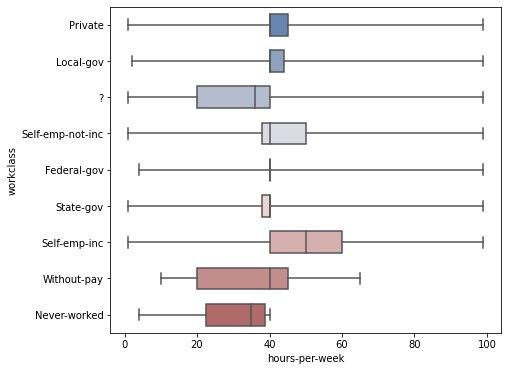

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="hours-per-week", y="workclass", data=df,whis=[0, 100], width=.6, palette="vlag")

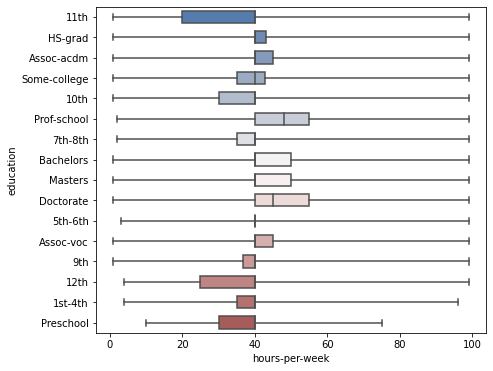

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="hours-per-week", y="education", data=df,whis=[0, 100], width=.6, palette="vlag")

#### Limpieza de datos

In [ ]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df_clean = df.copy()

In [ ]:
df.shape

(48842, 15)

In [ ]:
df_clean['native-country'] = df['native-country'].replace('?',np.nan)
df_clean['workclass'] = df['workclass'].replace('?',np.nan)
df_clean['occupation'] = df['occupation'].replace('?',np.nan)

#Eliminar NAN's
df_clean.dropna(how='any',inplace=True)

In [ ]:
df.shape

(48842, 15)

In [ ]:
#Reclasificando education
df_clean['education'].replace('Preschool', 'abandono',inplace=True)
df_clean['education'].replace('10th', 'abandono',inplace=True)
df_clean['education'].replace('11th', 'abandono',inplace=True)
df_clean['education'].replace('12th', 'abandono',inplace=True)
df_clean['education'].replace('1st-4th', 'abandono',inplace=True)
df_clean['education'].replace('5th-6th', 'abandono',inplace=True)
df_clean['education'].replace('7th-8th', 'abandono',inplace=True)
df_clean['education'].replace('9th', 'abandono',inplace=True)
df_clean['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df_clean['education'].replace('HS-grad', 'HighGrad',inplace=True)
df_clean['education'].replace('Some-college', 'CommunityCollege',inplace=True) # Universidad comunitaria
df_clean['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df_clean['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df_clean['education'].replace('Bachelors', 'Bachelors',inplace=True)
df_clean['education'].replace('Masters', 'Masters',inplace=True)
df_clean['education'].replace('Prof-school', 'Masters',inplace=True)
df_clean['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
#Reclasificando marital-status
df_clean['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df_clean['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df_clean['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df_clean['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df_clean['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df_clean['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df_clean['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [ ]:
#Asignando valores numéricos a las variables categóricas
# number = LabelEncoder()
# df_clean['workclass'] = number.fit_transform(df_clean['workclass'])
# df_clean['education'] = number.fit_transform(df_clean['education'])
# df_clean['marital-status'] = number.fit_transform(df_clean['marital-status'])
# df_clean['occupation'] = number.fit_transform(df_clean['occupation'])
# df_clean['relationship'] = number.fit_transform(df_clean['relationship'])
# df_clean['race'] = number.fit_transform(df_clean['race'])
# df_clean['gender'] = number.fit_transform(df_clean['gender'])
# df_clean['native-country'] = number.fit_transform(df_clean['native-country'])
# df_clean['predclass'] = number.fit_transform(df_clean['income'])

In [ ]:
df_clean.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,abandono,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighGrad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,CommunityCollege,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,CommunityCollege,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,abandono,6,NotMarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
#Segmentando data por edad
df_clean['age_bin'] = pd.cut(df_clean['age'], 20)
#Segmentando data por horas de trabajo semanales
df_clean['hours-per-week_bin'] = pd.cut(df_clean['hours-per-week'], 10)
# df_clean['hours-per-week'] = df_clean['hours-per-week']

In [ ]:
#Media de edad por income
df_clean[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.01
0,<=50K,36.75


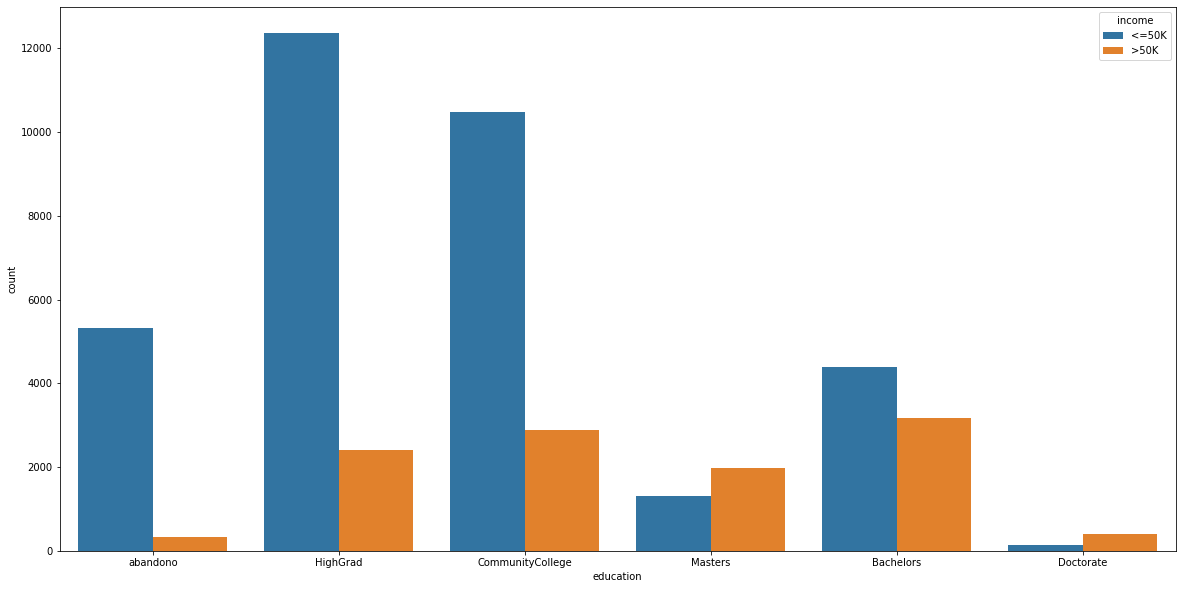

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(data=df_clean, x='education', hue='income')

<Figure size 1440x720 with 0 Axes>

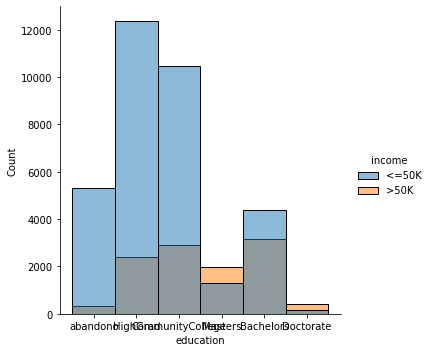

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.displot(df_clean, x='education', hue='income')

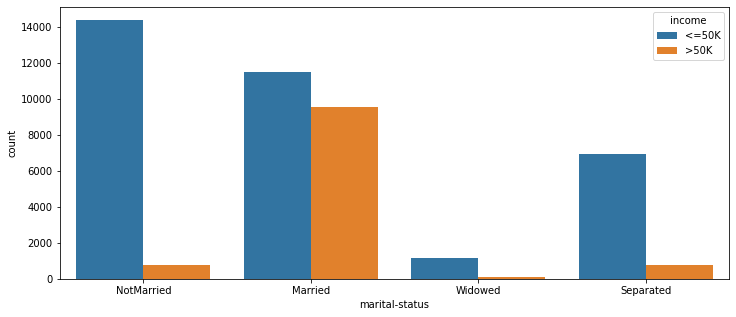

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x="marital-status", hue="income", data=df_clean, ax=ax)

<Figure size 1440x720 with 0 Axes>

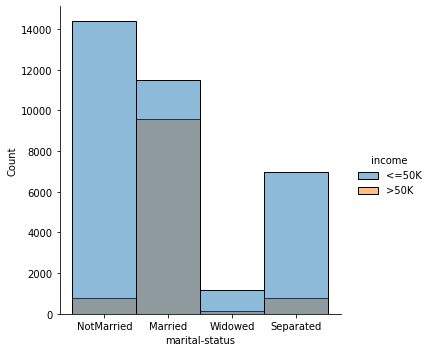

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.displot(df_clean, x='marital-status', hue='income')

In [ ]:
pd.crosstab(index=df_clean['gender'],columns=df_clean['income'],normalize='index')

income,<=50K,>50K
gender,,
Female,0.89,0.11
Male,0.69,0.31


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df_clean_cat = df_clean[["workclass","education","marital-status","occupation","relationship","race","gender","native-country"]].apply(LabelEncoder().fit_transform)
df_clean_num = df_clean[["age","educational-num","capital-gain","capital-loss","hours-per-week","income","age_bin","hours-per-week_bin"]]

df_clean = pd.concat([df_clean_cat,df_clean_num], axis=1)
df_clean.head()

# ["workclass","education","marital-status","occupation","relationship","race","gender","native-country"]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week,income,age_bin,hours-per-week_bin
0,2,5,1,6,3,2,1,38,25,7,0,0,40,<=50K,"(24.3, 27.95]","(30.4, 40.2]"
1,2,3,0,4,0,4,1,38,38,9,0,0,50,<=50K,"(35.25, 38.9]","(40.2, 50.0]"
2,1,1,0,10,0,4,1,38,28,12,0,0,40,>50K,"(27.95, 31.6]","(30.4, 40.2]"
3,2,1,0,6,0,2,1,38,44,10,7688,0,40,>50K,"(42.55, 46.2]","(30.4, 40.2]"
5,2,5,1,7,1,4,1,38,34,6,0,0,30,<=50K,"(31.6, 35.25]","(20.6, 30.4]"


In [ ]:
df_clean['age-hours'] = df_clean['age']*df_clean['hours-per-week']
df_clean['age-hours_bin'] = pd.cut(df_clean['age-hours'], 10)

In [ ]:
drop_elements = ['education', 'native-country', 'income', 'age_bin', 'age-hours_bin','hours-per-week_bin']
# drop_elements = ['education', 'native-country', 'income', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = df_clean["income"]
X = df_clean.drop(drop_elements, axis=1)
# X = X.drop('income',1)
X.head()

,workclass,marital-status,occupation,relationship,race,gender,age,educational-num,capital-gain,capital-loss,hours-per-week,age-hours
0,2,1,6,3,2,1,25,7,0,0,40,1000
1,2,0,4,0,4,1,38,9,0,0,50,1900
2,1,0,10,0,4,1,28,12,0,0,40,1120
3,2,0,6,0,2,1,44,10,7688,0,40,1760
5,2,1,7,1,4,1,34,6,0,0,30,1020


 **Planteamiento del problema: 
¿ Porque algunas personas tienen ingresos mayores ( a 50K $) que otras?**



In [ ]:
# Feedback :

# - Analizar el resto de variables para encontrar posibles candidatas para armar otras hipótesis
# - Revisar casos de outliers con ingresos muy elevados
# - 

In [ ]:
df_clean.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,2,5,1,6,3,2,1,38,25,7,0,0,40,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1000,"(909.9, 1798.8]"
1,2,3,0,4,0,4,1,38,38,9,0,0,50,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1900,"(1798.8, 2687.7]"
2,1,1,0,10,0,4,1,38,28,12,0,0,40,>50K,"(27.95, 31.6]","(30.4, 40.2]",1120,"(909.9, 1798.8]"
3,2,1,0,6,0,2,1,38,44,10,7688,0,40,>50K,"(42.55, 46.2]","(30.4, 40.2]",1760,"(909.9, 1798.8]"
5,2,5,1,7,1,4,1,38,34,6,0,0,30,<=50K,"(31.6, 35.25]","(20.6, 30.4]",1020,"(909.9, 1798.8]"


In [ ]:
df_clean.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week,age-hours
count,"45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00","45,222.00"
mean,2.20,2.22,0.76,5.97,1.41,3.68,0.68,36.40,38.55,10.12,"1,101.43",88.60,40.94,"1,594.26"
std,0.96,1.63,0.83,4.03,1.60,0.83,0.47,6.08,13.22,2.55,"7,506.43",404.96,12.01,732.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,1.00,0.00,0.00,1.00,21.00
25%,2.00,1.00,0.00,2.00,0.00,4.00,0.00,38.00,28.00,9.00,0.00,0.00,40.00,"1,080.00"
50%,2.00,3.00,1.00,6.00,1.00,4.00,1.00,38.00,37.00,10.00,0.00,0.00,40.00,"1,536.00"
75%,2.00,3.00,1.00,9.00,3.00,4.00,1.00,38.00,47.00,13.00,0.00,0.00,45.00,"2,040.00"
max,6.00,5.00,3.00,13.00,5.00,4.00,1.00,40.00,90.00,16.00,"99,999.00","4,356.00",99.00,"8,910.00"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,train_size=0.6, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
X_train

,workclass,marital-status,occupation,relationship,race,gender,age,educational-num,capital-gain,capital-loss,hours-per-week,age-hours
0,-0.22,-0.92,0.01,2.24,0.39,-1.44,-0.34,-0.43,-0.15,-0.21,-0.08,-0.32
1,-0.22,0.28,0.26,0.99,-1.99,0.70,-1.40,-1.22,-0.15,-0.21,-0.08,-1.08
2,-0.22,0.28,0.26,0.99,-1.99,-1.44,-1.62,-2.00,-0.15,-0.21,-0.08,-1.25
3,-0.22,-0.92,-0.98,-0.89,-0.80,0.70,1.02,-3.17,-0.15,-0.21,0.75,1.37
4,2.92,0.28,0.26,0.99,0.39,0.70,-1.47,-0.04,-0.15,-0.21,-2.58,-1.92
...,...,...,...,...,...,...,...,...,...,...,...,...
27128,-1.26,-0.92,0.26,-0.89,-3.18,0.70,1.93,-0.43,-0.15,-0.21,-0.50,0.88
27129,-0.22,1.47,1.25,1.61,0.39,0.70,0.72,1.13,-0.15,-0.21,-0.08,0.45
27130,-0.22,0.28,-1.48,0.99,0.39,-1.44,-1.32,-0.04,-0.15,4.13,-0.50,-1.17
27131,-0.22,1.47,1.25,0.99,0.39,-1.44,-0.04,-0.04,-0.15,-0.21,-1.33,-0.88


In [ ]:
from sklearn import linear_model

In [ ]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
score_DT = DT.score(X_test,y_test)
print("The accuracy of the Decision tree model is ",score_DT)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Decision tree model is  0.8105478467576981
              precision    recall  f1-score   support

       <=50k       0.87      0.88      0.87     13541
        >50k       0.63      0.59      0.61      4548

    accuracy                           0.81     18089
   macro avg       0.75      0.74      0.74     18089
weighted avg       0.81      0.81      0.81     18089



In [ ]:
# Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
score_GNB = GNB.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes model is', score_GNB)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of Gaussian Naive Bayes model is 0.7969484216927415
              precision    recall  f1-score   support

       <=50k       0.82      0.94      0.87     13541
        >50k       0.67      0.38      0.48      4548

    accuracy                           0.80     18089
   macro avg       0.74      0.66      0.68     18089
weighted avg       0.78      0.80      0.78     18089



In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the KNN Model is 0.8262479960196805
              precision    recall  f1-score   support

       <=50k       0.87      0.91      0.89     13541
        >50k       0.68      0.59      0.63      4548

    accuracy                           0.83     18089
   macro avg       0.77      0.75      0.76     18089
weighted avg       0.82      0.83      0.82     18089



In [ ]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC model is', score_svc)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of SVC model is 0.8402343965946155
              precision    recall  f1-score   support

       <=50k       0.86      0.94      0.90     13541
        >50k       0.75      0.55      0.63      4548

    accuracy                           0.84     18089
   macro avg       0.81      0.74      0.77     18089
weighted avg       0.83      0.84      0.83     18089



In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score_LR = LR.score(X_test,y_test)
print('The accuracy of the Logistic Regression model is', score_LR)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Logistic Regression model is 0.829067389020952
              precision    recall  f1-score   support

       <=50k       0.85      0.93      0.89     13541
        >50k       0.72      0.53      0.61      4548

    accuracy                           0.83     18089
   macro avg       0.79      0.73      0.75     18089
weighted avg       0.82      0.83      0.82     18089



In [ ]:
# Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
score_RF = RF.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_RF)
targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred,target_names=targets))

The accuracy of the Random Forest Model is 0.8428326607330422
              precision    recall  f1-score   support

       <=50k       0.88      0.92      0.90     13541
        >50k       0.72      0.62      0.66      4548

    accuracy                           0.84     18089
   macro avg       0.80      0.77      0.78     18089
weighted avg       0.84      0.84      0.84     18089



# Tabulating all classifiers accuracy in a tabular form

In [ ]:
tabular_form = {'CLASSIFICATION':['LogisticRegression','SupportVectorClassifier','RandomForestClassifier','DecisionTree','GaussianNaiveBayes','K-NearestNeighbors'],
                'ACCURACY':[score_LR,score_svc,score_RF,score_DT,score_GNB,score_knn]
                }
Tabular_form = pd.DataFrame(tabular_form,columns= ['CLASSIFICATION','ACCURACY'])
print(Tabular_form)

            CLASSIFICATION  ACCURACY
0       LogisticRegression      0.83
1  SupportVectorClassifier      0.84
2   RandomForestClassifier      0.84
3             DecisionTree      0.81
4       GaussianNaiveBayes      0.80
5       K-NearestNeighbors      0.83
